
# Netflix

Netflix is an American subscription video on-demand over-the-top streaming television service owned and operated by Netflix, Inc., a company based in Los Gatos, California. It offers films and television series from various genres, and it is available in multiple languages.

Netflix was launched on January 16, 2007, nearly a decade after Netflix, Inc. began its DVD-by-mail service. With over 232 million paid memberships in more than 190 countries, it is the most-subscribed video on demand streaming service. By 2022, original productions accounted for half of Netflix's library in the United States, and the company had ventured into other categories, such as video game publishing via the Netflix service.
**bold text**



# Problem Statement

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.




In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
# Importing the Data
df= pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [112]:
df.shape

(8807, 12)

# Features Description

Dataset contains 8k rows and 12 columns.

Following are the description of features:

1. Show_id: Unique ID for every Movie / Tv Show

2. Type: Identifier - A Movie or TV Show

3. Title: Title of the Movie / Tv Show

4. Director: Director of the Movie

5. Cast: Actors involved in the movie/show

6. Country: Country where the movie/show was produced

7. Date_added: Date it was added on Netflix

8. Release_year: Actual Release year of the movie/show

9. Rating: TV Rating of the movie/show

10. Duration: Total Duration - in minutes or number of seasons

11. Listed_in: Genre

12. Description: The summary description





In [113]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [119]:
#We are converting the datatype of date_added from object to datetime.
df['date_added'] = pd.to_datetime(df['date_added'], format='%d/%m/%Y',errors='coerce')


In [120]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


The Data has only one integer value that is release_year else all are object.

In [121]:
#Changing cast datatype from 'Object' to 'String'
df["cast"]= df["cast"].astype('str')

In [122]:
#Changing country datatype from 'Object' to 'String'
df["country"]=df["country"].values.astype('str')

In [123]:
#Removing extra spaces from datapoints
df['type']= df['type'].str.strip()
df['title']= df['title'].str.strip()
df['director']= df['director'].str.strip()
df['cast']= df['cast'].str.strip()
df['listed_in']= df['listed_in'].str.strip()
df['description']= df['description'].str.strip()

In [124]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


In [39]:
df.nunique()

,0
show_id,8807
type,2
title,8806
director,4528
cast,7693
country,749
date_added,0
release_year,74
rating,17
duration,220


In [40]:
#We will check release year column description because only this is integer form
df.describe()['release_year']

,release_year
count,8807.000000
mean,2014.180198
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000
std,8.819312


## 8807 movies and TV Shows have been released on Netflix between year 1925 to 2021.

In [213]:
# Number of movies or TV Shows that each country have.
df["country"]= df["country"].str.strip()

In [42]:
# Countries That have content on Netflix
country_top10=df["country"].str.split(", ").explode().reset_index()
country_top10=country_top10[country_top10["country"]!="nan"]
country_top10


,index,country
0,0,United States
1,1,South Africa
4,4,India
7,7,United States
8,7,Ghana
...,...,...
10839,8801,Jordan
10840,8802,United States
10842,8804,United States
10843,8805,United States


<ipython-input-214-bbbb0166361f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=country_top10, y="country", order=country_top10["country"].value_counts().index[:20], palette="YlGnBu")


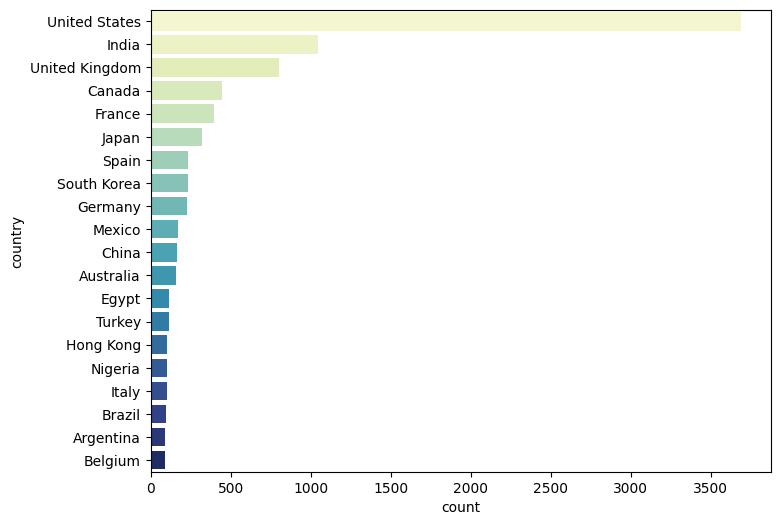

In [214]:
# Top 10 Countries which have shows on Netflix
plt.figure(figsize=(8,6))
sns.countplot(data=country_top10, y="country", order=country_top10["country"].value_counts().index[:20], palette="YlGnBu")
plt.show()


Hence, Most shows are from United States followed by India.

In [125]:
df.shape

(8807, 12)

In [126]:
# Splitting the data for Movies and Tv Shows
df_movies= df[df["type"]=="Movie"]
df_tv= df[df["type"]!="Movie"]

In [127]:
 # Getting the most frequent actor in Movies
movies_cast = df_movies["cast"].str.split(",").explode().value_counts()  # Returns Series
movies_cast = movies_cast.reset_index()  # Convert Series to DataFrame
movies_cast.columns = ["actor_name", "cast"]  # Rename columns explicitly
movies_cast = movies_cast[movies_cast["actor_name"]!= "nan"]  # Rename columns explicitly


# Getting the most frequent actor in TV
tv_cast = df_tv["cast"].str.split(",").explode().value_counts()  # Returns Series
tv_cast = tv_cast.reset_index()  # Convert Series to DataFrame
tv_cast.columns = ["actor_name", "cast"]  # Rename columns explicitly
tv_cast = tv_cast[tv_cast["actor_name"]!= "nan"]

<ipython-input-128-8f4ad188e369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movies_cast_top10,y="actor_name", x='cast',palette="YlGnBu",ax=axes[0])
<ipython-input-128-8f4ad188e369>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tv_cast_top10,y ="actor_name", x='cast', palette="YlGnBu",ax=axes[1])


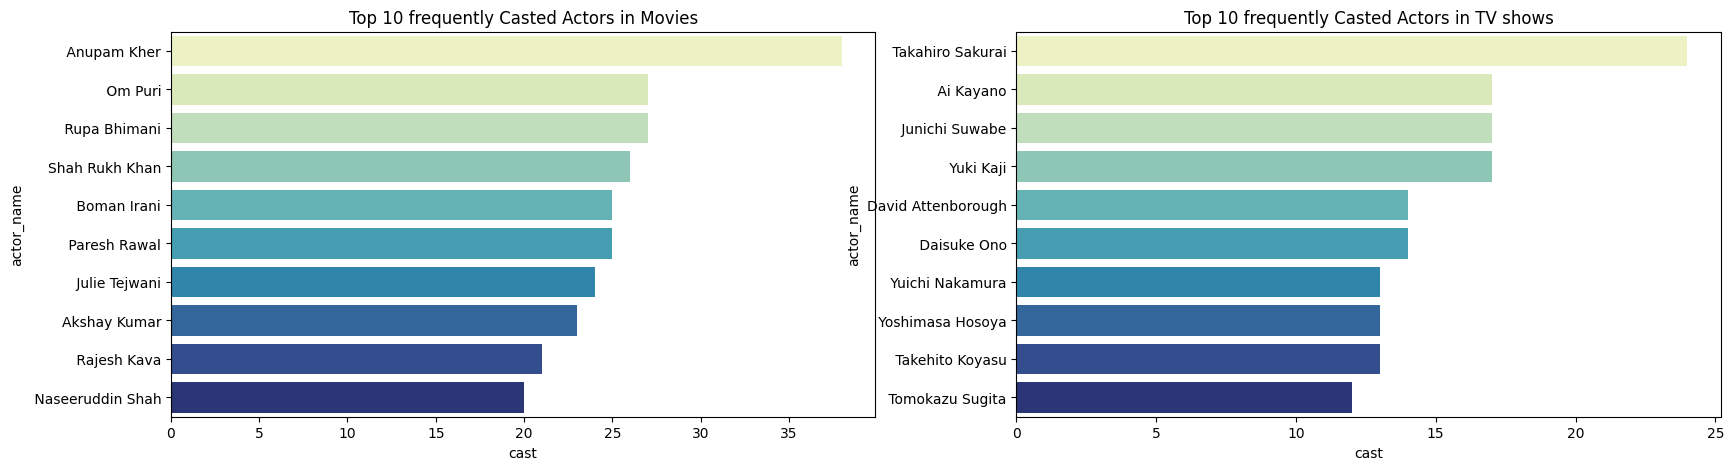

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
movies_cast_top10 = movies_cast.sort_values("cast", ascending=False)[:10]
sns.barplot(data=movies_cast_top10,y="actor_name", x='cast',palette="YlGnBu",ax=axes[0])
axes[0].set_title("Top 10 frequently Casted Actors in Movies")


tv_cast_top10 = tv_cast.sort_values("cast", ascending=False)[:10]
sns.barplot(data=tv_cast_top10,y ="actor_name", x='cast', palette="YlGnBu",ax=axes[1])
axes[1].set_title("Top 10 frequently Casted Actors in TV shows")
plt.show()

Netflix has high number of movies where cast includes Anupam Kher followed by Om Puri and high number of TV Shows where cast includes River Huang followed by David Attenborough.

In [129]:
# Getting top 10 director in movies
movies_director = df_movies['director'].str.split(",").explode().value_counts()
movies_director = movies_director.reset_index()
movies_director.columns = ["director_name", "movies"]
movies_director = movies_director[movies_director["director_name"]!= "nan"]

# Getting top 10 director in TV shows
tv_director = df_tv['director'].str.split(",").explode().value_counts()
tv_director = tv_director.reset_index()
tv_director.columns = ["director_name", "tv_shows"]
tv_director = tv_director[tv_director["director_name"]!= "nan"]

<ipython-input-130-6ed133a654a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movies_director_top10, y="director_name", x='movies', palette="Dark2",ax=axes[0])
<ipython-input-130-6ed133a654a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tv_director_top10, y="director_name", x='tv_shows', palette="Dark2",ax=axes[1])


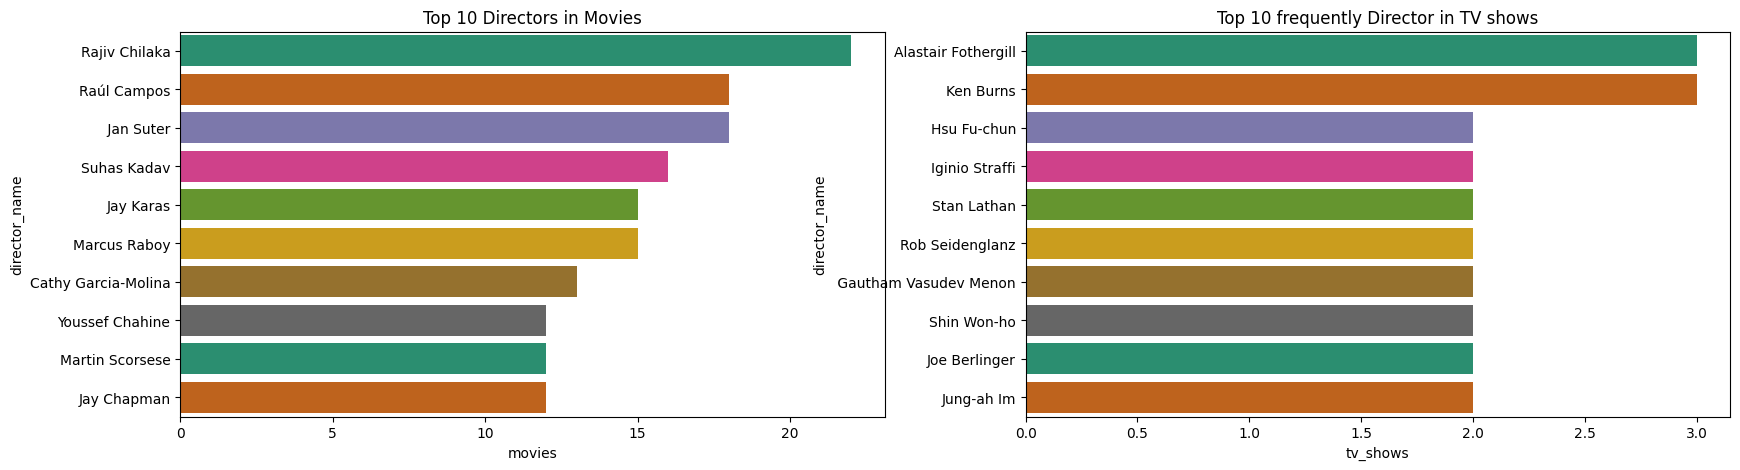

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
movies_director_top10 = movies_director.sort_values("movies", ascending=False)[:10]
sns.barplot(data=movies_director_top10, y="director_name", x='movies', palette="Dark2",ax=axes[0])
axes[0].set_title("Top 10 Directors in Movies")


tv_director_top10 = tv_director.sort_values("tv_shows", ascending=False)[:10]
sns.barplot(data=tv_director_top10, y="director_name", x='tv_shows', palette="Dark2",ax=axes[1])
axes[1].set_title("Top 10 frequently Director in TV shows")
plt.show()

Netflix has high number of movies directed by Rajiv Chilaka followed by Raul Campos and Jan Suter. It has high number of TV Shows directed by Alastair Fothergill followed by Ken Burns.

In [131]:
# Percentage of Ratings given to different movies and TV shows
df_movies["rating"].value_counts(normalize=True)

,proportion
rating,
TV-MA,0.336433
TV-14,0.232828
R,0.130038
TV-PG,0.088106
PG-13,0.079948
PG,0.046827
TV-Y7,0.022679
TV-Y,0.021374
TV-G,0.020558


<ipython-input-132-d04b417dec34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_movies, y='rating', order=df_movies['rating'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
<ipython-input-132-d04b417dec34>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tv, y='rating', order=df_tv['rating'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])


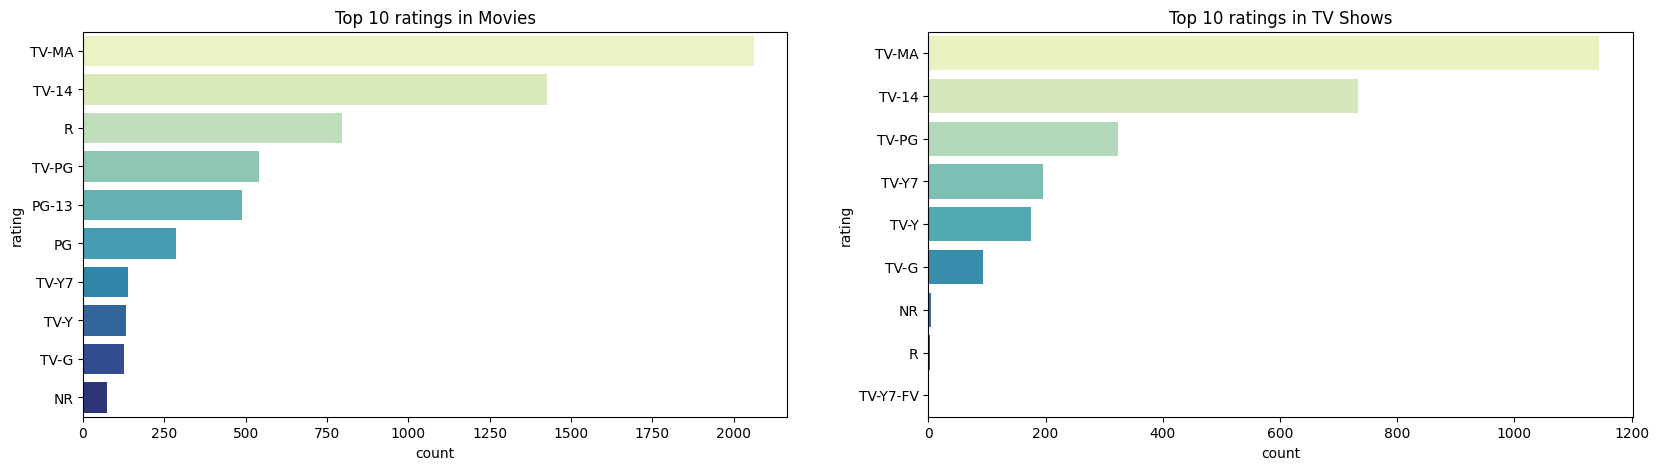

In [132]:
# Comparing Top 10 ratings in Movies and In Tv Shows
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
sns.countplot(data=df_movies, y='rating', order=df_movies['rating'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
axes[0].set_title("Top 10 ratings in Movies")

sns.countplot(data=df_tv, y='rating', order=df_tv['rating'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])
axes[1].set_title("Top 10 ratings in TV Shows")
plt.show()

TV-MA' is the highest rating that has been given to most of the movies, followed by 'TV-14' and 'R'. In case of TV Shows highest rating given is 'TV-MA', followed by 'TV-14' and 'TV_PG'.

<ipython-input-133-5da69028843a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_movies, y='rating', order=df_movies['rating'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
<ipython-input-133-5da69028843a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tv, y='rating', order=df_tv['rating'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])


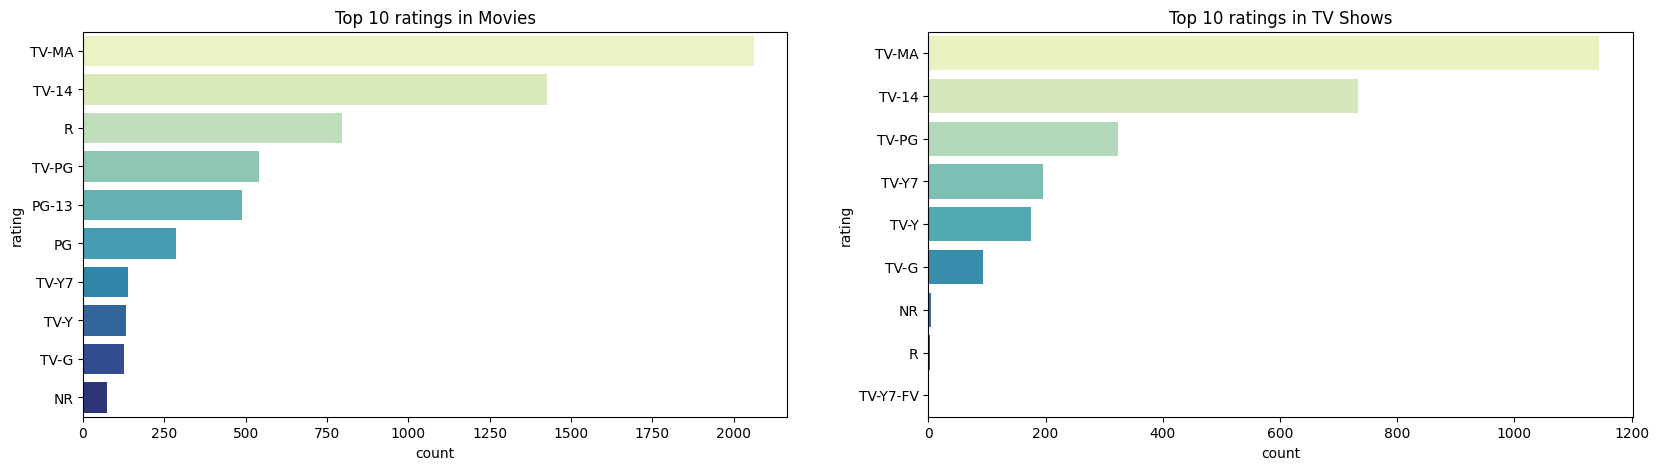

In [133]:
# Comparing Top 10 ratings in Movies and In Tv Shows
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['g','p']
axes = ax.ravel()
sns.countplot(data=df_movies, y='rating', order=df_movies['rating'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
axes[0].set_title("Top 10 ratings in Movies")

sns.countplot(data=df_tv, y='rating', order=df_tv['rating'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])
axes[1].set_title("Top 10 ratings in TV Shows")
plt.show()

TV-MA' is the highest rating that has been given to most of the movies, followed by 'TV-14' and 'R'. In case of TV Shows highest rating given is 'TV-MA', followed by 'TV-14' and 'TV_PG'.

<ipython-input-134-3fb578cdecee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_movies, y='duration', order=df_movies['duration'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
<ipython-input-134-3fb578cdecee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tv, y='duration', order=df_tv['duration'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])


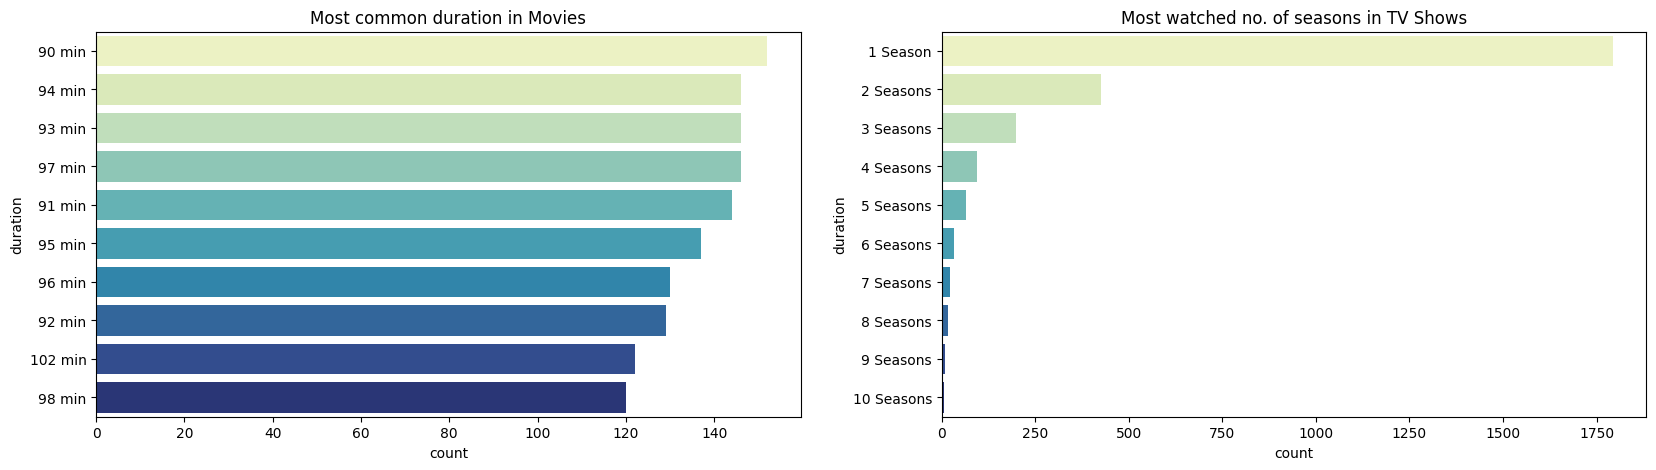

In [134]:
# Getting Top 10 Most Common Duration for Movies and TV Shows
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
sns.countplot(data=df_movies, y='duration', order=df_movies['duration'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
axes[0].set_title("Most common duration in Movies")

sns.countplot(data=df_tv, y='duration', order=df_tv['duration'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])
axes[1].set_title("Most watched no. of seasons in TV Shows")
plt.show()

Mostly Movies available on Netflix are of 90 minutes, followed by 93 minutes and 94 minutes. In case of TV Shows, mostly TV shows available consists of 1 season, followed by 2 seasons and 5 seasons.

In [135]:
 # sns.lineplot(data=df_movies,x="country",y="release_year")
# sns.lineplot(data=df_tv,x="country",y="release_year")
# plt.show()
# df_movies.groupby(['country', 'release_year']).count()
# df_movies.groupby("country")["release_year"].count()
df_movies.groupby("country")["release_year"].value_counts()

country            release_year
, France, Algeria  2014            1
Argentina          2018            8
                   2020            7
                   2016            6
                   2019            6
                                  ..
nan                2003            1
                   2004            1
                   2005            1
                   2006            1
                   2008            1
Name: count, Length: 1517, dtype: int64

In [136]:
# All Genres available on Netflix
df_movies["listed_in"].str.split(",").explode().value_counts()

,count
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
Independent Movies,736
Romantic Movies,613
Children & Family Movies,605


In [137]:
# Getting all genres available in Movies
movies_genre =df_movies["listed_in"].str.split(",").explode().value_counts()
movies_genre = movies_genre.reset_index()
movies_genre.columns = ["genre", "movies"]
movies_genre = movies_genre[movies_genre["genre"]!= "nan"]

# Getting all genres available in TV Shows
tv_genre = df_tv["listed_in"].str.split(",").explode().value_counts()
tv_genre = tv_genre.reset_index()
tv_genre.columns = ["genre", "tv_shows"]
tv_genre = tv_genre[tv_genre["genre"]!= "nan"]

<ipython-input-139-1bbcde299472>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movies_genre_top10, y="genre", x='movies', palette="coolwarm_r",ax=axes[0])
<ipython-input-139-1bbcde299472>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tv_genre_top10, y="genre", x='tv_shows', palette="coolwarm_r",ax=axes[1])


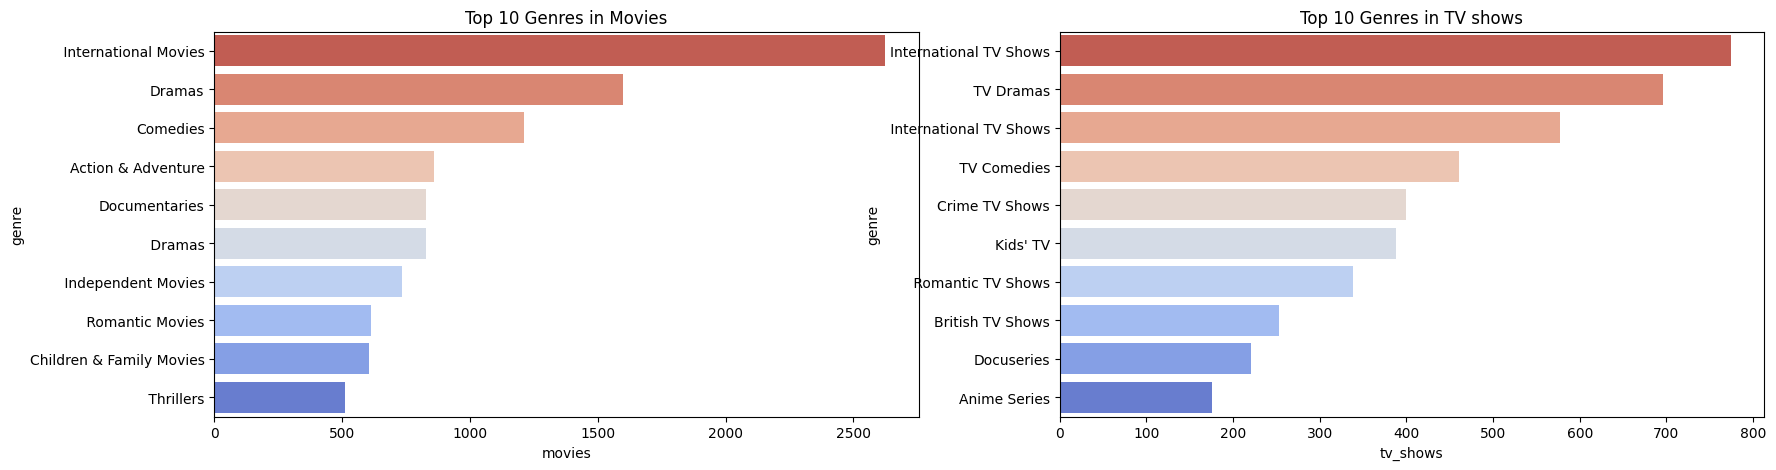

In [139]:
# Top 10 genres in Movies and TV Shows
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
movies_genre_top10 = movies_genre.sort_values("movies", ascending=False)[:10]
sns.barplot(data=movies_genre_top10, y="genre", x='movies', palette="coolwarm_r",ax=axes[0])
axes[0].set_title("Top 10 Genres in Movies")


tv_genre_top10 = tv_genre.sort_values("tv_shows", ascending=False)[:10]
sns.barplot(data=tv_genre_top10, y="genre", x='tv_shows', palette="coolwarm_r",ax=axes[1])
axes[1].set_title("Top 10 Genres in TV shows")
plt.show()



International movies and TV Shows are the most commonly available on Netflix, followed by Dramas and Comedies in Movies and followed by Drama and Crime in TV Shows.

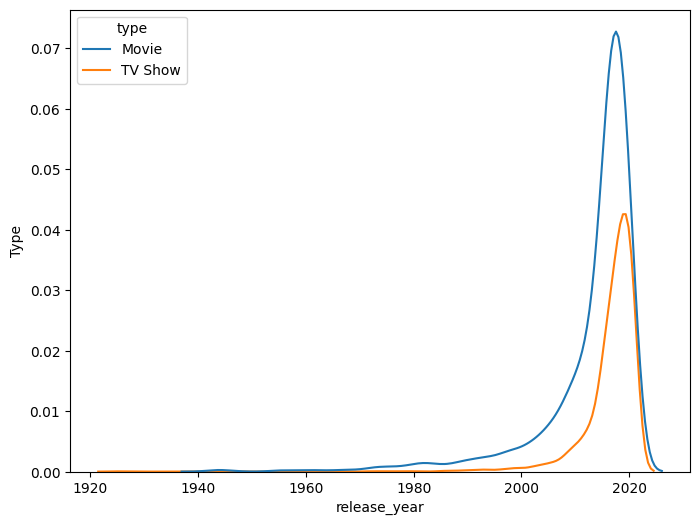

In [147]:
# No. of Movies and TV Shows released per year
plt.figure(figsize=(8,6))
sns.kdeplot(x='release_year',
 hue='type',
 data=df).set_ylabel("Type")
plt.show()


Most of the Movies and TV Shows available on Netflix were released around 2020.

In [149]:
df["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [150]:
# Splitting Director Names and making a list
c1= df["director"].apply(lambda x: str(x).split(",")).tolist()
c1[:20]

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', ' José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', ' Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan']]

In [152]:
# Converting list of Names of Directors to a DataFrame
df_new1=pd.DataFrame(c1,index=df["title"])
df_new1

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [153]:
# Stacking the Names of Directors
df_new1= df_new1.stack()
df_new1

,,0
title,,
Dick Johnson Is Dead,0,Kirsten Johnson
Blood & Water,0,nan
Ganglands,0,Julien Leclercq
Jailbirds New Orleans,0,nan
Kota Factory,0,nan
...,...,...
Zodiac,0,David Fincher
Zombie Dumb,0,nan
Zombieland,0,Ruben Fleischer


In [154]:
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [155]:
# Renaming the columns
df_new1.rename(columns={0:"Directors"},inplace=True)
df_new1

,title,level_1,Directors
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [156]:
# Dropping unnecessary columns
df_new1.drop(['level_1'],axis=1,inplace=True)


In [157]:
# Unnested Director Column
df_new1

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [158]:
# Splitting Cast Names and making a list
c2= df["cast"].apply(lambda x: str(x).split(",")).tolist()

# Converting list of Names of Actors to a DataFrame
df_new2=pd.DataFrame(c2,index=df["title"])

# Stacking the Names of Directors
df_new2= df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())

# Renaming the columns
df_new2.rename(columns={0:"Actors"},inplace=True)

# Dropping unnecessary columns
df_new2.drop(['level_1'],axis=1,inplace= True)
df_new2


,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [159]:
# Splitting Country names and making a list
c3= df["country"].apply(lambda x: str(x).split(",")).tolist()

# Converting List to DataFrame
df_new3= pd.DataFrame(c3,index=df["title"])

# Stacking the country Names
df_new3= df_new3.stack()
df_new3= pd.DataFrame(df_new3.reset_index())

# Renaming the columns
df_new3.rename(columns={0:"countries"},inplace=True)

# Dropping unnecessary columns
df_new3.drop(['level_1'],axis=1,inplace= True)
df_new3

,title,countries
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [160]:
# Splitting Genre names and making a list
c4= df["listed_in"].apply(lambda x: str(x).split(",")).tolist()

# Converting List to DataFrame
df_new4= pd.DataFrame(c4,index=df["title"])

# Stacking the country Names
df_new4= df_new4.stack()
df_new4= pd.DataFrame(df_new4.reset_index())

# Renaming the columns
df_new4.rename(columns={0:"Genre"},inplace=True)

# Dropping unnecessary columns
df_new4.drop(['level_1'],axis=1,inplace= True)
df_new4

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [161]:
# merging the unnested director data with unnested actor data
df_new5= df_new2.merge(df_new1,on=['title'],how='inner')

# merging the above merged data with unnested country data
df_new6= df_new5.merge(df_new3,on=['title'],how='inner')

# merging the above merged data with unnested genre data
df_new7= df_new6.merge(df_new4,on=['title'],how='inner')
df_new7

,title,Actors,Directors,countries,Genre
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...
202396,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
202397,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
202398,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
202399,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [209]:
# merging unnested data with the original data
df_final= df_new7.merge(df[['show_id','type','title','date_added','release_year','rating','duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,countries,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,NaT,2020,PG-13,90 min
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,NaT,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,NaT,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,NaT,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,NaT,2021,TV-MA,2 Seasons


In [170]:
# Splitting data into 2 parts movie and TV
movie= pd.DataFrame(df_final[df_final["type"]=="Movie"])
TV= pd.DataFrame(df_final[df_final["type"]!="Movie"])
movie.head()

,title,Actors,Directors,countries,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,NaT,2020,PG-13,90 min
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,nan,Children & Family Movies,s7,Movie,NaT,2021,PG,91 min
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,nan,Children & Family Movies,s7,Movie,NaT,2021,PG,91 min
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,nan,Children & Family Movies,s7,Movie,NaT,2021,PG,91 min
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,nan,Children & Family Movies,s7,Movie,NaT,2021,PG,91 min


In [171]:
# Top 10 Directors who directed most movies on Netflix, excluding 'nan' directors
top_10 = pd.DataFrame(movie[movie['Directors'] !='nan'] # Filter out 'nan' directors
                       .groupby("release_year")[["Directors"]]
                       .value_counts()
                       .sort_values(ascending=False)
                       .reset_index(name="No_of_movies")[:11])
top_10 = top_10.sort_values(by=["No_of_movies"], ascending=False).head(11)
top_10

,release_year,Directors,No_of_movies
0,2014,Ozan Açıktan,768
1,2013,Lars von Trier,336
2,2013,Ari Folman,210
3,2001,Robert Altman,180
4,2015,Tom Hooper,180
5,2011,Sarah Smith,176
6,2019,Farhad Safinia,176
7,2017,Nora Twomey,168
8,2018,Soudade Kaadan,168
9,2010,Edgar Wright,168


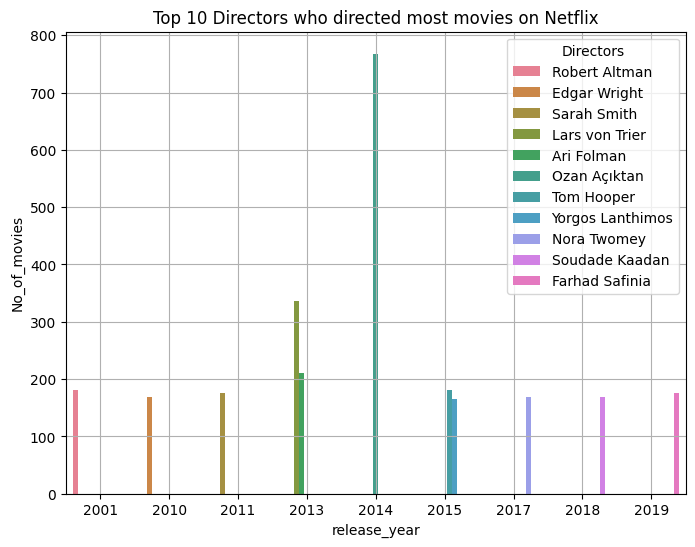

In [197]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10, x="release_year", y="No_of_movies",hue = "Directors").set_title("Top 10 Directors who directed most movies on Netflix")  # Set title using the Axes object
plt.grid()
plt.show()


Nuam Murro has most released TV Shows on Netflix in the year 2018,followed by Thomas Astruc in year 2019 and Damien Chazelle in the year 2020.

In [196]:
# Most Popular Genre available on Netflix countrywise
df_final["Genre"]=df_final["Genre"].str.strip()
top_genre = pd.DataFrame(df_final.groupby("Genre")[["countries"]].value_counts().sort_values(ascending=False).reset_index())[:20]
top_genre.rename(columns={'count': "No_of_movies"}, inplace=True)
top_genre= top_genre[top_genre["Genre"]!="nan"]
top_genre

,Genre,countries,No_of_movies
0,Comedies,United States,7571
1,International Movies,India,6910
2,Dramas,United States,6651
3,Dramas,India,5400
4,Children & Family Movies,United States,4200
5,Action & Adventure,United States,3654
6,Independent Movies,United States,3337
7,Comedies,India,2616
8,TV Dramas,United States,2221
9,Thrillers,United States,2176


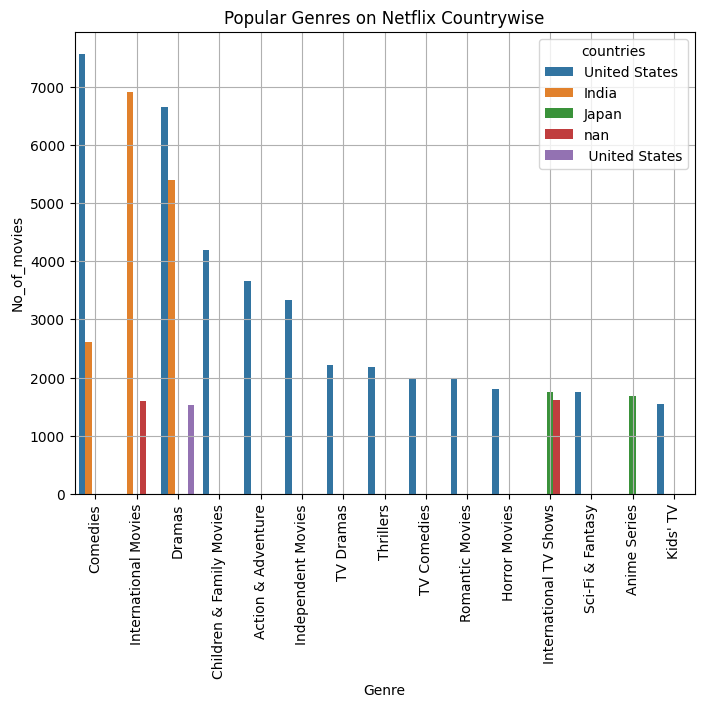

In [199]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_genre,x="Genre",y="No_of_movies",hue="countries").set_title("Popular Genres on Netflix Countrywise")
plt.xticks(rotation=90)
plt.grid()
plt.show()

## <font color="red" face='georgia'>Business Insights</font>

1. Most of the content is available in the form of Movies having duration of 90 mins (1.5 Hrs).
2. Majority content is coming from United States & United Kingdom.
3. In Movies, most popular genre is Action & Adventure. In TV Shows, most popular genre is British T.V Shows.
4. Most of the content was uploaded during the year of 2018-2021.
5. TV-MA is the most popular rating among other ratings.
6. Most movies are available in 90 min duration, while T.V Shows are available in single season.

## <font color="green" face='georgia'>Recommendations</font>

1. Netflix should focus on adding more movies with durations ranging from 90 to 95 minutes.

2. Generally, Q4 and Q1 are the best times to upload content to the platform.

3. TV-MA, TV-14, TV-PG, and R are some of the most popularly rated contents that should be available.

4. Action and Adventure, British TV Shows, Anime Series, and Comedy are a few of the genres that should be featured on the platform.

5. Netflix should upload more movies and content from those countries that have lower content on the platform, such as Argentina, Belgium, Italy, the Philippines, etc.


6. We can observe that people prefer watching their local actors movies. So Netflix can try to include Actors from those countries that have low content on the platform, geography-wise. So that more viewers from such countries get encouraged to watch shows and movies of their favorite local actors.


7. As per the observation, the following ratings have the lowest contribution genre-wise: G,TV-Y7-FV, UR, and NC-17. Hence, Netflix should upload more of such content.


8. For the USA audience, 80–120 minutes is the recommended length for movies, and Kids TV Shows are also popular along with the genres in the first point, hence recommended. For the UK audience, the recommended length for movies is the same as that of the USA (80–120 minutes).


9. The target audience in the USA and India is recommended to be 14+ and above, while for the UK, it is recommended to be completely mature or R content.